## DataSet creation

In [1]:
from sklearn.datasets import make_classification
X, Y = make_classification(
    n_features=4, n_redundant=0, n_informative=3, n_clusters_per_class=2, n_classes=3
)

## Step 2: Split the data and make tensor

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((67, 4), (33, 4), (67,), (33,))

In [6]:
import torch
import numpy as np

X_trainTensor = torch.from_numpy(X_train) # convert to tensors
y_trainTensor = torch.from_numpy(y_train)
X_testTensor = torch.from_numpy(X_test)
y_testTensor = torch.from_numpy(y_test)

## Built Neural network

In [7]:
from torch.utils.data import Dataset, DataLoader

class Data(Dataset):
    def __init__(self):
        self.X=torch.from_numpy(X_train)
        self.Y=torch.from_numpy(Y_train)
        self.len=self.X.shape[0]
    def __getitem__(self,index):      
        return self.X[index], self.Y[index]
    def __len__(self):
        return self.len
    
    
data=Data()
print(data.X[0] , data.Y[0])
print(data. __getitem__(0))
loader=DataLoader(dataset=data,batch_size=64)

tensor([-0.3931, -1.8741, -0.0056, -0.3202], dtype=torch.float64) tensor(0)
(tensor([-0.3931, -1.8741, -0.0056, -0.3202], dtype=torch.float64), tensor(0))


In [8]:
import torch.nn as nn

#First of all, we will define the dimensions of the network.

input_dim=4     # how many Variables are in the dataset
hidden_dim = 30 # hidden layers
output_dim=3    # number of classe


class Net(nn.Module):
    def __init__(self,input,H,output):
        super(Net,self).__init__()
        self.linear1=nn.Linear(input,H)
        self.linear2=nn.Linear(H,output)
 
        
    def forward(self,x):
        x=torch.sigmoid(self.linear1(x))  
        x=self.linear2(x)
        return x
    
clf=Net(input_dim,hidden_dim,output_dim)    # object of the network
print(clf.parameters)                       # object parameter 

<bound method Module.parameters of Net(
  (linear1): Linear(in_features=4, out_features=30, bias=True)
  (linear2): Linear(in_features=30, out_features=3, bias=True)
)>


## Model Training

In [11]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(clf.parameters(), lr=0.1)

# After defining the criterion and optimizer, we are ready to train our model. Using the following lines of codes we can train it.

learning_rate = 1e-1
loss_list = []
for t in range(10):
    y_pred = clf(X_trainTensor.float())
    loss = criterion(y_pred, y_trainTensor.long()) # calculate the loss
    loss_list.append(loss.item())
    optimizer.zero_grad() # Venish the gradient before the next step to save the memory
    print( loss.backward())
    # loss.backward()  # Backward of the network 
    optimizer.step() # update the parameters

None
None
None
None
None
None
None
None
None
None


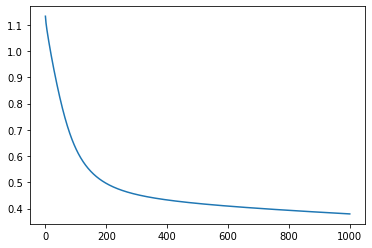

In [ ]:
import matplotlib.pyplot as plt
step = np.linspace(0,1000,1000)
plt.plot(step,np.array(loss_list))

(-3.1765822799666807, 4.313554861263233)

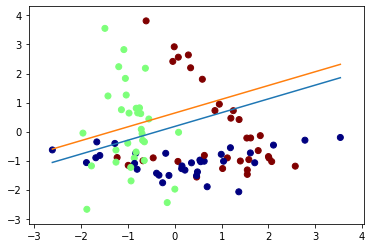

In [ ]:
params = list(clf.parameters())
w = params[0].detach().numpy()[0]
b = params[1].detach().numpy()[0]
t= params[3].detach().numpy()[0]
plt.scatter(X[:, 0], X[:, 1], c=Y,cmap='jet')
u = np.linspace(X[:, 0].min(), X[:, 0].max(), 2)
plt.plot(u, (0.5-b-w[0]*u)/w[1])
plt.plot(u, (0.5-t-w[0]*u)/w[1])
plt.xlim(X[:, 0].min()-0.5, X[:, 0].max()+0.5)
plt.ylim(X[:, 1].min()-0.5, X[:, 1].max()+0.5)